# Multiple pendulum plots. Section 12.5: Chaos and sensitivity to initial conditions

Use Pendulum class to generate basic pendulum plots.  Applied here to figures from Taylor Section 12.5.

* Last revised 26-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [32]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    L1 : float
        length of first pendulum
    L2 : float
        length of second pendulum 
    g : float
        gravitational acceleration
    m1 : float
        mass of first pendulum bob
    m2: float
        mass of second pendulum bob 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
 
    """
    def __init__(self, L1=1., L2=1.,
                 g=1., mass1=1., mass2=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = phi_1(t) and y[1] = dphi_1/dt, y[2]= phi_2(t), y[3]= dphi_2/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        phi1 = y[0]
        z1 = y[1]
        phi2 = y[2]
        z2 = y[3]
        
        cos, sin = np.cos(phi1 - phi2), np.sin(phi1 - phi2)
        denomenator = (self.m1 + self.m2 * sin **2)
        
        z1_dot = ((self.m2 * self.g * np.sin(phi2) * cos) - (self.m2 * sin *(self.L1 * (z1**2) * cos + self.L2 * (z2**2) )) \
                   - (self.m1 + self.m2) * self.g * np.sin(phi1))/ (self.L1 * denomenator )
        
        z2_dot = ((self.m1 + self.m2) * (self.L1 * (z1**2) * sin - self.g * np.sin(phi2) + self.g * np.sin(phi1) * cos) \
                   + self.m2 * self.L2 * (z2**2) * sin * cos )/ (self.L2 * denomenator) 
        
        
        return z1, z1_dot, z2, z2_dot
    
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        
        phi1, phi1_dot, phi2, phi2_dot = solution.y
        
        return phi1, phi1_dot, phi2, phi2_dot

In [33]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [34]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for the double pendulum

We'll set it up with the specified parameters.

In [35]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.



# Instantiate a pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, 
              g=g, mass1=m1, mass2=m2)




(<AxesSubplot:xlabel='$t$', ylabel='$\\phi(t)$'>,
 <matplotlib.lines.Line2D at 0x7f285ea543d0>)

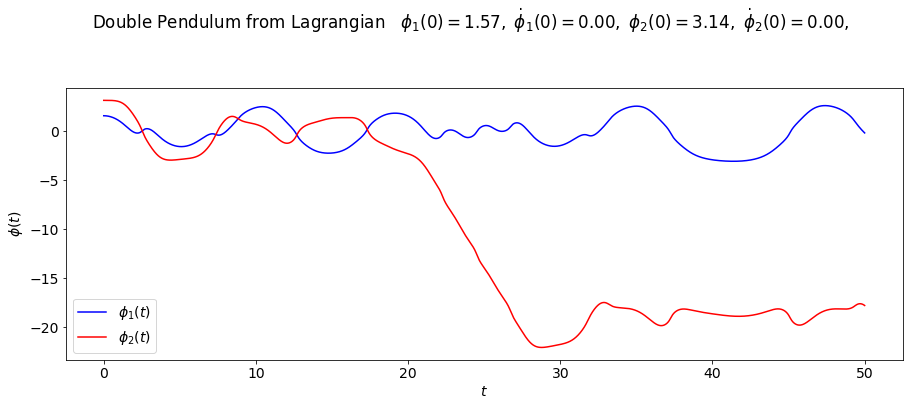

In [36]:
# initial conditions specified
phi1_0 = np.pi / 2.
phi1_dot_0 = 0.
phi2_0 = np.pi 
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum from Lagrangian  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label= r'$\phi_1(t)$', 
            title=None, 
            ax=ax_a)    
                              
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label= r'$\phi_2(t)$', 
            title=None, 
            ax=ax_a)    



## Make plots for Taylor figure 12.11 in section 12.5

This time we plot $\Delta \phi$.

(<AxesSubplot:xlabel='$t$', ylabel='$\\phi(t)$'>,
 <matplotlib.lines.Line2D at 0x7f285f690850>)

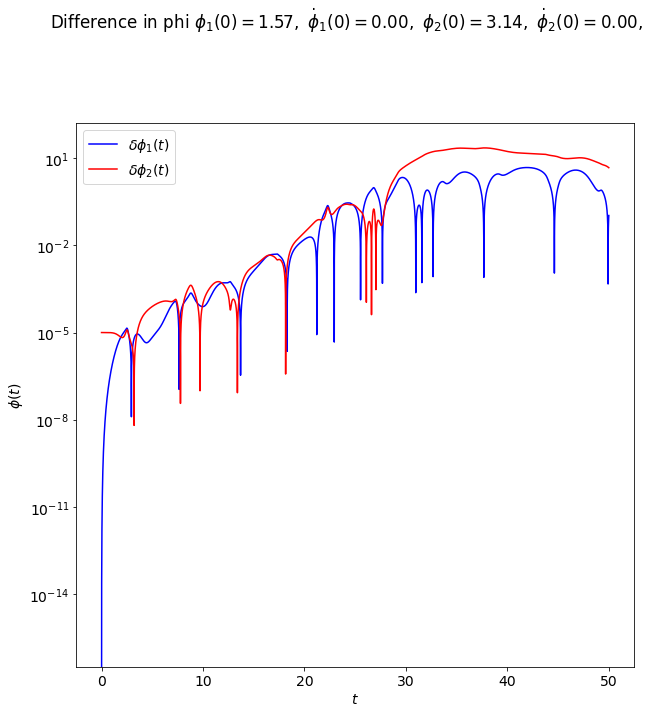

In [39]:
# make a plot of Delta phi for same pendulum but two different initial conds
# initial conditions specified
phi1_0 = np.pi / 2.
phi1_dot_0 = 0.
phi2_0 = np.pi 
phi2_dot_0 = 0.

phi1a, phi1a_dot, phi2a, phi2a_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
phi1b, phi1b_dot, phi2b, phi2b_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0 - 0.00001, phi2_dot_0)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi1 = np.fabs(phi1b - phi1a)
Delta_phi2 = np.fabs(phi2b - phi2a)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Difference in phi' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(1,1,1)                 

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], Delta_phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label= r'$\delta\phi_1(t)$', 
            title=None, semilogy = True,
            ax=ax_a)  
plot_y_vs_x(t_pts[start : stop], Delta_phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label= r'$\delta\phi_2(t)$', 
            title=None, semilogy = True, 
            ax=ax_a)  



What is setting the limit here?  Here it "real" or a numerical artifact?

Repeat but change `abserr` and `relerr` to `1.e-10`, which is $1.0 \times 10^{-10}$.

In [ ]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = phi_0 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 - .1   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.11:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.11.png', bbox_inches='tight')  

Ok, now we see the expect exponential decay from the linear regime:
  
  $\begin{align}
    \Delta\phi(t) = D e^{-\beta t} \cos(\omega_1 t - \delta)
  \end{align}$
  
which implies an exponential decay times an oscillating term, meaning we get something like the graph!
  
Does the slope work out?  We see that $\log_{10}\Delta\phi$ vs. $t$ is a straight line.  But
  
  $\begin{align}
    \log_{10}[\Delta\phi(t)] = \log_{10}D - \beta t \log_{10}e + \log_{10} \cos(\omega_1 t - \delta)
  \end{align}$

so on a semi-log plot, the slope is $-\beta\log_{10} e$.  At $t$ goes from 0 to 10, $\log_{10}[\Delta\phi(t)]$ goes from $-1$ to $-11$, so the slope is about $-1$.  Therefore, this predicts $\beta \approx 1/ \log_{10} e$.  Check it out:


In [ ]:
1./np.log10(np.e)

Yep, it works!  Let's check the state space plots together:

In [ ]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 10., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 32$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.12: Looking at $\Delta\phi$ for $\gamma = 1.07$ 


In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.07
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

In [ ]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 - .1   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.12:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.12.png', bbox_inches='tight')  

Let's check the state space plots together:

In [ ]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 10., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 32$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.13: Looking at $\Delta\phi$ for $\gamma = 1.105$ 


In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.105
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

In [ ]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-4   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.13:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.13.png', bbox_inches='tight')  

Let's check the state space plots together:

In [ ]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.14: Looking at $\Delta\phi$ for $\gamma = 1.13$ 


In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.13
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

In [ ]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-4   # 10^{-3} radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.14:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.14.png', bbox_inches='tight')  

Let's check the state space plots together:

In [ ]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.15: Looking at $\Delta\phi$ for $\gamma = 1.503$ 


In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.503
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

In [ ]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-3   # 10^{-3} radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.15:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.15.png', bbox_inches='tight')  

In [ ]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.15b:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=25 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 25.)
ax_a.plot(t_pts[start : stop], phi_1[start : stop], 
            color='blue', label=None)    
ax_a.plot(t_pts[start : stop], phi_2[start : stop], 
            color='red', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$\phi(t)$')

                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
#fig.savefig('figure_12.15b.png', bbox_inches='tight')  

Let's check the state space plots together:

In [ ]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 16)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 16$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()
